## Importing our libaries

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### loading our Iris data frame 

In [182]:
DataSetIris=ds.load_iris(return_X_y=True)

#### Spliting our data and labels 

In [183]:
DataSetIrisFeatures=DataSetIris[0]
DataSetIrisLabels=DataSetIris[1]

### A view of dataset 

In [184]:
frame=pd.DataFrame(dataset_data,columns=["sepal length","sepal width","patal length","patal width"])
frame['labels']=dataset_labels
frame.tail()

,sepal length,sepal width,patal length,patal width,labels
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


#### Spliting our training set and test set 

In [185]:
x=frame[['patal length']]
y=frame[['labels']]

In [186]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Defining Our Gaussian Probability

In [187]:
def bayes(x,std,mean):
    return (1/(np.sqrt(2*np.pi*(np.power(std,2)))))*np.exp(-(1/2)*((x-mean)**2/std**2))

## Splitting our data in to tree class label 

##### Creating new Data Frame for our train and test sets 

In [188]:
new_train_frame=pd.DataFrame(x_train)
new_train_frame['labels']=y_train

new_test_frame=pd.DataFrame(x_test)
new_test_frame['labels']=y_test

#### Grouping  Training data sets with labels

In [189]:
new_train_frame_grouped=new_train_frame.groupby('labels')
label_0_train_data=new_train_frame_grouped.get_group(0)
label_1_train_data=new_train_frame_grouped.get_group(1)
label_2_train_data=new_train_frame_grouped.get_group(2)

#### Calculating Standard Deviation and mean of each labels  

In [190]:
label_0_mean=label_0_train_data['patal length'].values.mean()
label_0_std=label_0_train_data['patal length'].values.std()

label_1_mean=label_1_train_data['patal length'].values.mean()
label_1_std=label_1_train_data['patal length'].values.std()

label_2_mean=label_2_train_data['patal length'].values.mean()
label_2_std=label_2_train_data['patal length'].values.std()

#### Calculating bayes value for each labels 

In [191]:
label_0_y=list()
for x in label_0_train_data['patal length'].values:
    label_0_y.append(bayes(x,label_0_std,label_0_mean))
label_0_y=np.array(label_0_y)

label_1_y=list()
for x in label_1_train_data['patal length'].values:
    label_1_y.append(bayes(x,label_1_std,label_1_mean))
label_1_y=np.array(label_1_y)

label_2_y=list()
for x in label_2_train_data['patal length'].values:
    label_2_y.append(bayes(x,label_2_std,label_2_mean))
label_2_y=np.array(label_2_y)
label_0_y

array([2.02431772, 0.8574451 , 2.02431772, 1.51483997, 0.36711098,
       0.90473907, 1.56443301, 2.02431772, 1.51483997, 2.02431772,
       2.02431772, 2.02431772, 0.13095152, 2.04617173, 2.02431772,
       0.90473907, 2.02431772, 2.04617173, 0.13095152, 1.56443301,
       1.56443301, 2.04617173, 0.11888852, 2.02431772, 1.51483997,
       2.04617173, 1.51483997, 1.51483997, 0.90473907, 2.02431772,
       0.90473907, 2.04617173, 1.56443301, 2.04617173, 1.56443301,
       2.02431772, 2.02431772, 1.51483997, 0.8574451 ])

### Plotting The bayes value of each labels 

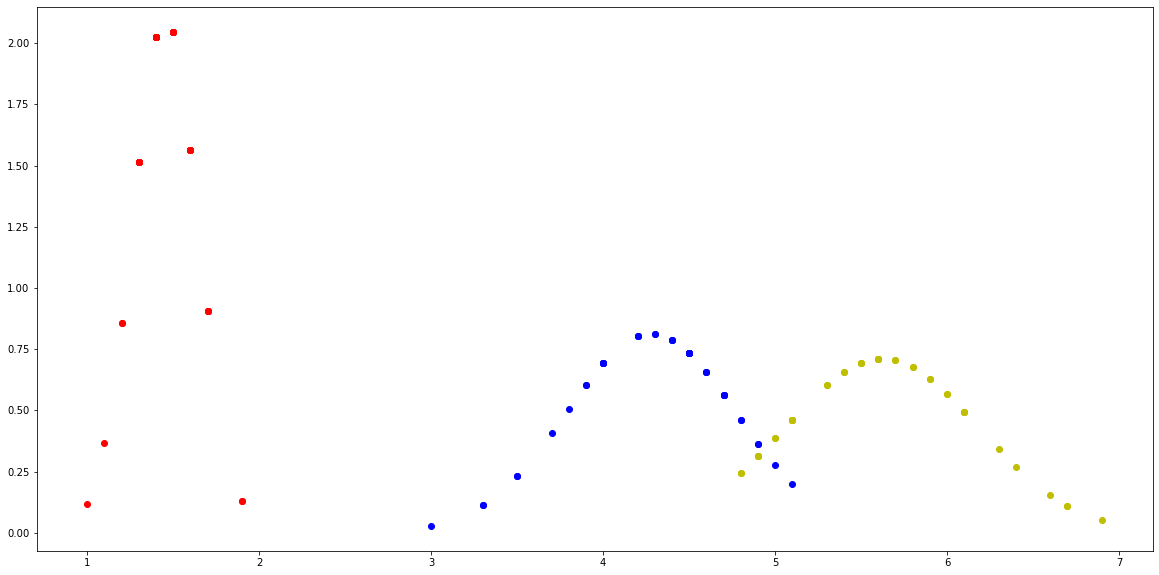

In [192]:
plt.figure(figsize=(20,10))
plt.plot(label_0_train_data['patal length'].values,label_0_y,'ro',
         label_1_train_data['patal length'].values,label_1_y,'bo',
         label_2_train_data['patal length'].values,label_2_y,'yo')
plt.show()

#### Testing our Test Set 

In [220]:
predicted_label=list()
for index in range(len(new_test_frame)):
    label_0_bays=bayes(new_test_frame['patal length'].values[index],label_0_std,label_0_mean)
    label_1_bays=bayes(new_test_frame['patal length'].values[index],label_1_std,label_1_mean)
    label_2_bays=bayes(new_test_frame['patal length'].values[index],label_2_std,label_2_mean)
    
    predicted=None
    if label_0_bays >= label_1_bays and label_0_bays >= label_2_bays:
        predicted=0
    elif label_1_bays >= label_0_bays and label_1_bays >= label_2_bays:
        predicted=1
    elif label_2_bays >= label_0_bays and label_2_bays >= label_1_bays:
        predicted=2
    
    predicted_label.append(predicted)
    

predicted_label=np.array(predicted_label)

predicted_label

array([1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1,
       0, 1, 2, 1, 0, 2, 2, 0])

### Our accuracy 

In [219]:
accuracy_score(new_test_frame['labels'].values,predicted_label)*100

96.66666666666667